In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [9]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f29b08663f444f20b2e6b3efa661a195 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='iqiCHQKx5uq4Zl23U9h1WkauaWPZ9reNukbZU_SPpsQ9',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_f29b08663f444f20b2e6b3efa661a195.get_object(Bucket='pythonfordatascience-donotdelete-pr-ieholgmjtfoddx',Key='BreastCancerWisconsin (1).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)


# Usecase

I belive that the healthcare industry will need to adopt the new technologies and could be improved throught utilizing machine learning, deep learning, and AI. Many countries seems to have a high demand for healthcare in relation to the supply. Some countries tries to fix this through increasring the supply, with for example higher wages for nurses, which leads to more nurses in the long run. While this is a good stratergy, I belive we can also lower the demand (calculated as sum of all time spent in healthcare). To exemplify, lets assume we have 10 patients whom need 1 hour each to be diagnosed. Then we need 10 man-hours of doctors. However, with machine learning we can possible help the doctors and thus lowering the amount of time needed per patient. Lets assume, this could lower the needed time by approx. 15 %. Then instead of 1 hour per patient, we need 50 min. So now we can, with 10 man-hours of doctors, take in 12 patients. Thus, we have successfully increased the capacity by 20%. 


This is of course a simplified example. However, it is clear that there is a possibility for machine learning to help the healthcare industry. 


In this analysis, I will use a dataset on breast cancer . The features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. These features are then used to predict maligent vs benign cancer. (source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))


The research question is: *Is is possible to predict malignent and begign cancers based on features describing the nuclei?*

# EDA

Lets begin by just having a look at the data to see what kind of data we are dealing with. The data seems to be well-structured and with 33 variables (including target). One feature is unknown which is the "Unnamed 32" feature.  Furthemore we have 569 datapoints which should be enough for a decent model. 

In [10]:
df.shape

(569, 33)

In [11]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

**Distribution between classes**


In some similair datasets we lack datapoints in one of the classes. Do we need to synthetically adddatapoints to this one? Only one way to find out!

The dataset has a good balance between the classes. 

B    357
M    212
Name: diagnosis, dtype: int64


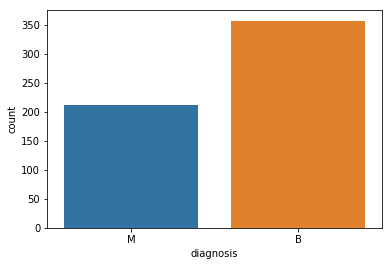

In [12]:
ax = sns.countplot(df.diagnosis,label="Count")
print(df['diagnosis'].value_counts())

**Drop columns**

We drop the "id" column as it does not contain information valuable in this analysis. The "unnamed 32" column is also dropped due to lack of knowledge of the column, we do not know what it represents. 


In [13]:
#drop the unneccessary columns 
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [14]:
df.shape

(569, 31)

So know we have 569 datapoints and 31 variables. 

**Check for NaN values**

Lets see if we have do remove/manipualte any rows based on NaN values

In [15]:
#check for NaN value 
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

luckily we have no NaNs

**Map target variable**


Lets map the target variable, "diagnosis", such that is binary with 1 and 0 instead of M and B. 

In [16]:
#change to 1 and 0 instead of Maliginent and beningn 
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

**Description of varaibles**


Now we will have a look at the different variables and their mean, std, and so on. 

In [17]:
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

**Extract features and target**

We create a dataframe with only the features and the target repspectivly, so we can do further analysis on the features seperatly.

In [18]:
df_features = df.iloc[:,1:31] #all features 
df_target = df.iloc[:,0:1] #the target 

**List different types of features**

As their are 31 features to analys, we can group them based on the characteristics such as if they are based on; mean;, se; or worst 

In [19]:
#list of column names that match with Mean
mean_cols = [col for col in df_features.columns if '_mean' in col]
#list of column names that match with SD
se_cols = [col for col in df_features.columns if '_se' in col]
#list of column names that match with Mean
worst_cols = [col for col in df_features.columns if '_worst' in col]

## Boxplot of features

**Boxplot of mean features**

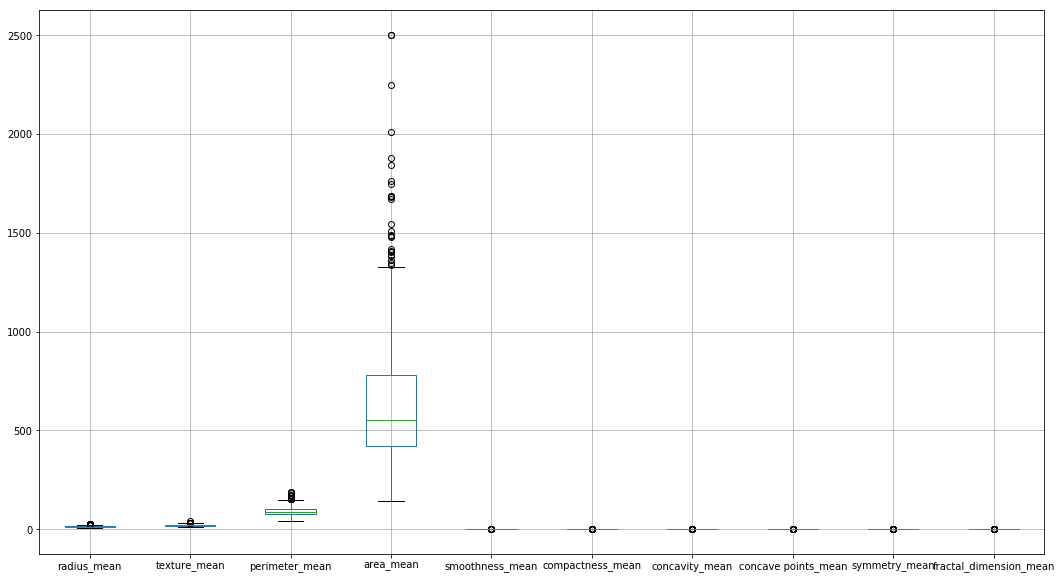

In [20]:
#plot all features that are based on "mean"
plot_dims = (18, 10)
plt_mean = df_features.boxplot(figsize = plot_dims, column=mean_cols)

**Boxplot of se features**

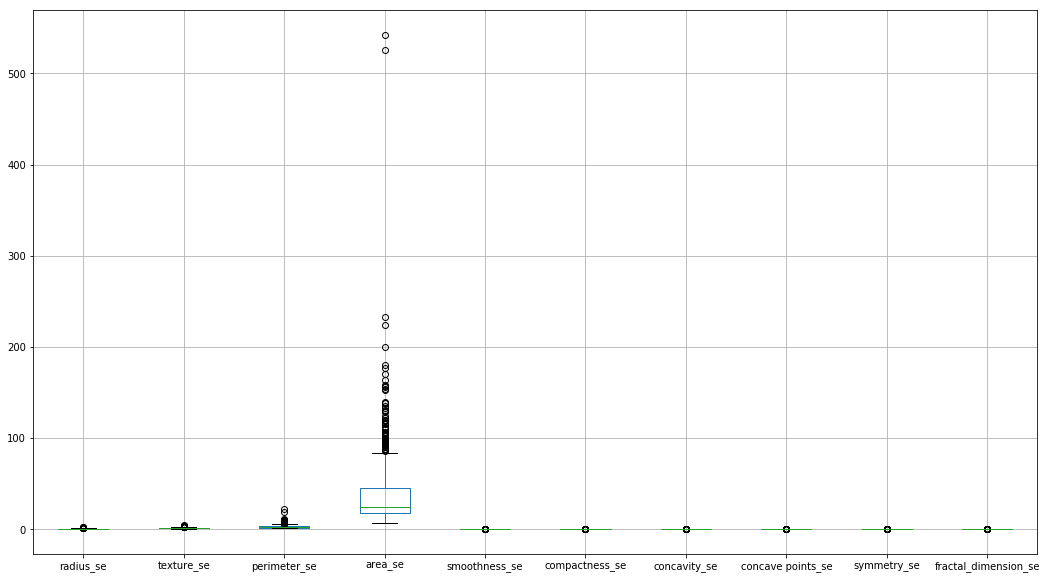

In [21]:
#plot all features that are based on "se"
plot_dims = (18, 10)
plt_se = df_features.boxplot(figsize = plot_dims, column =se_cols)

**Boxplot of worst features**

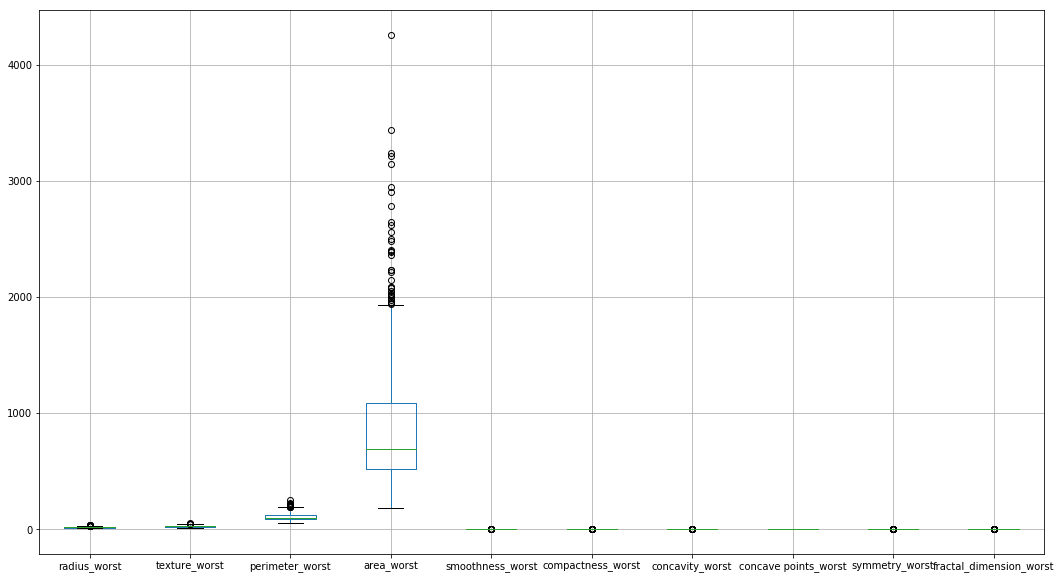

In [22]:
#plot all features that are based on "worst"
plot_dims = (18, 10)
plt_worst = df_features.boxplot(figsize = plot_dims, column =worst_cols)

As we can see, the columns with "area" are numerically larger than the other features. Therefore it could be useful to normalize the data. 

## Data Normalization

In [23]:
df_features_normal= (df_features - df_features.mean()) / (df_features.std())   # standardization of all features
df_normal = pd.concat([df_target,df_features_normal],axis=1)


## Pairplot of all normalized features

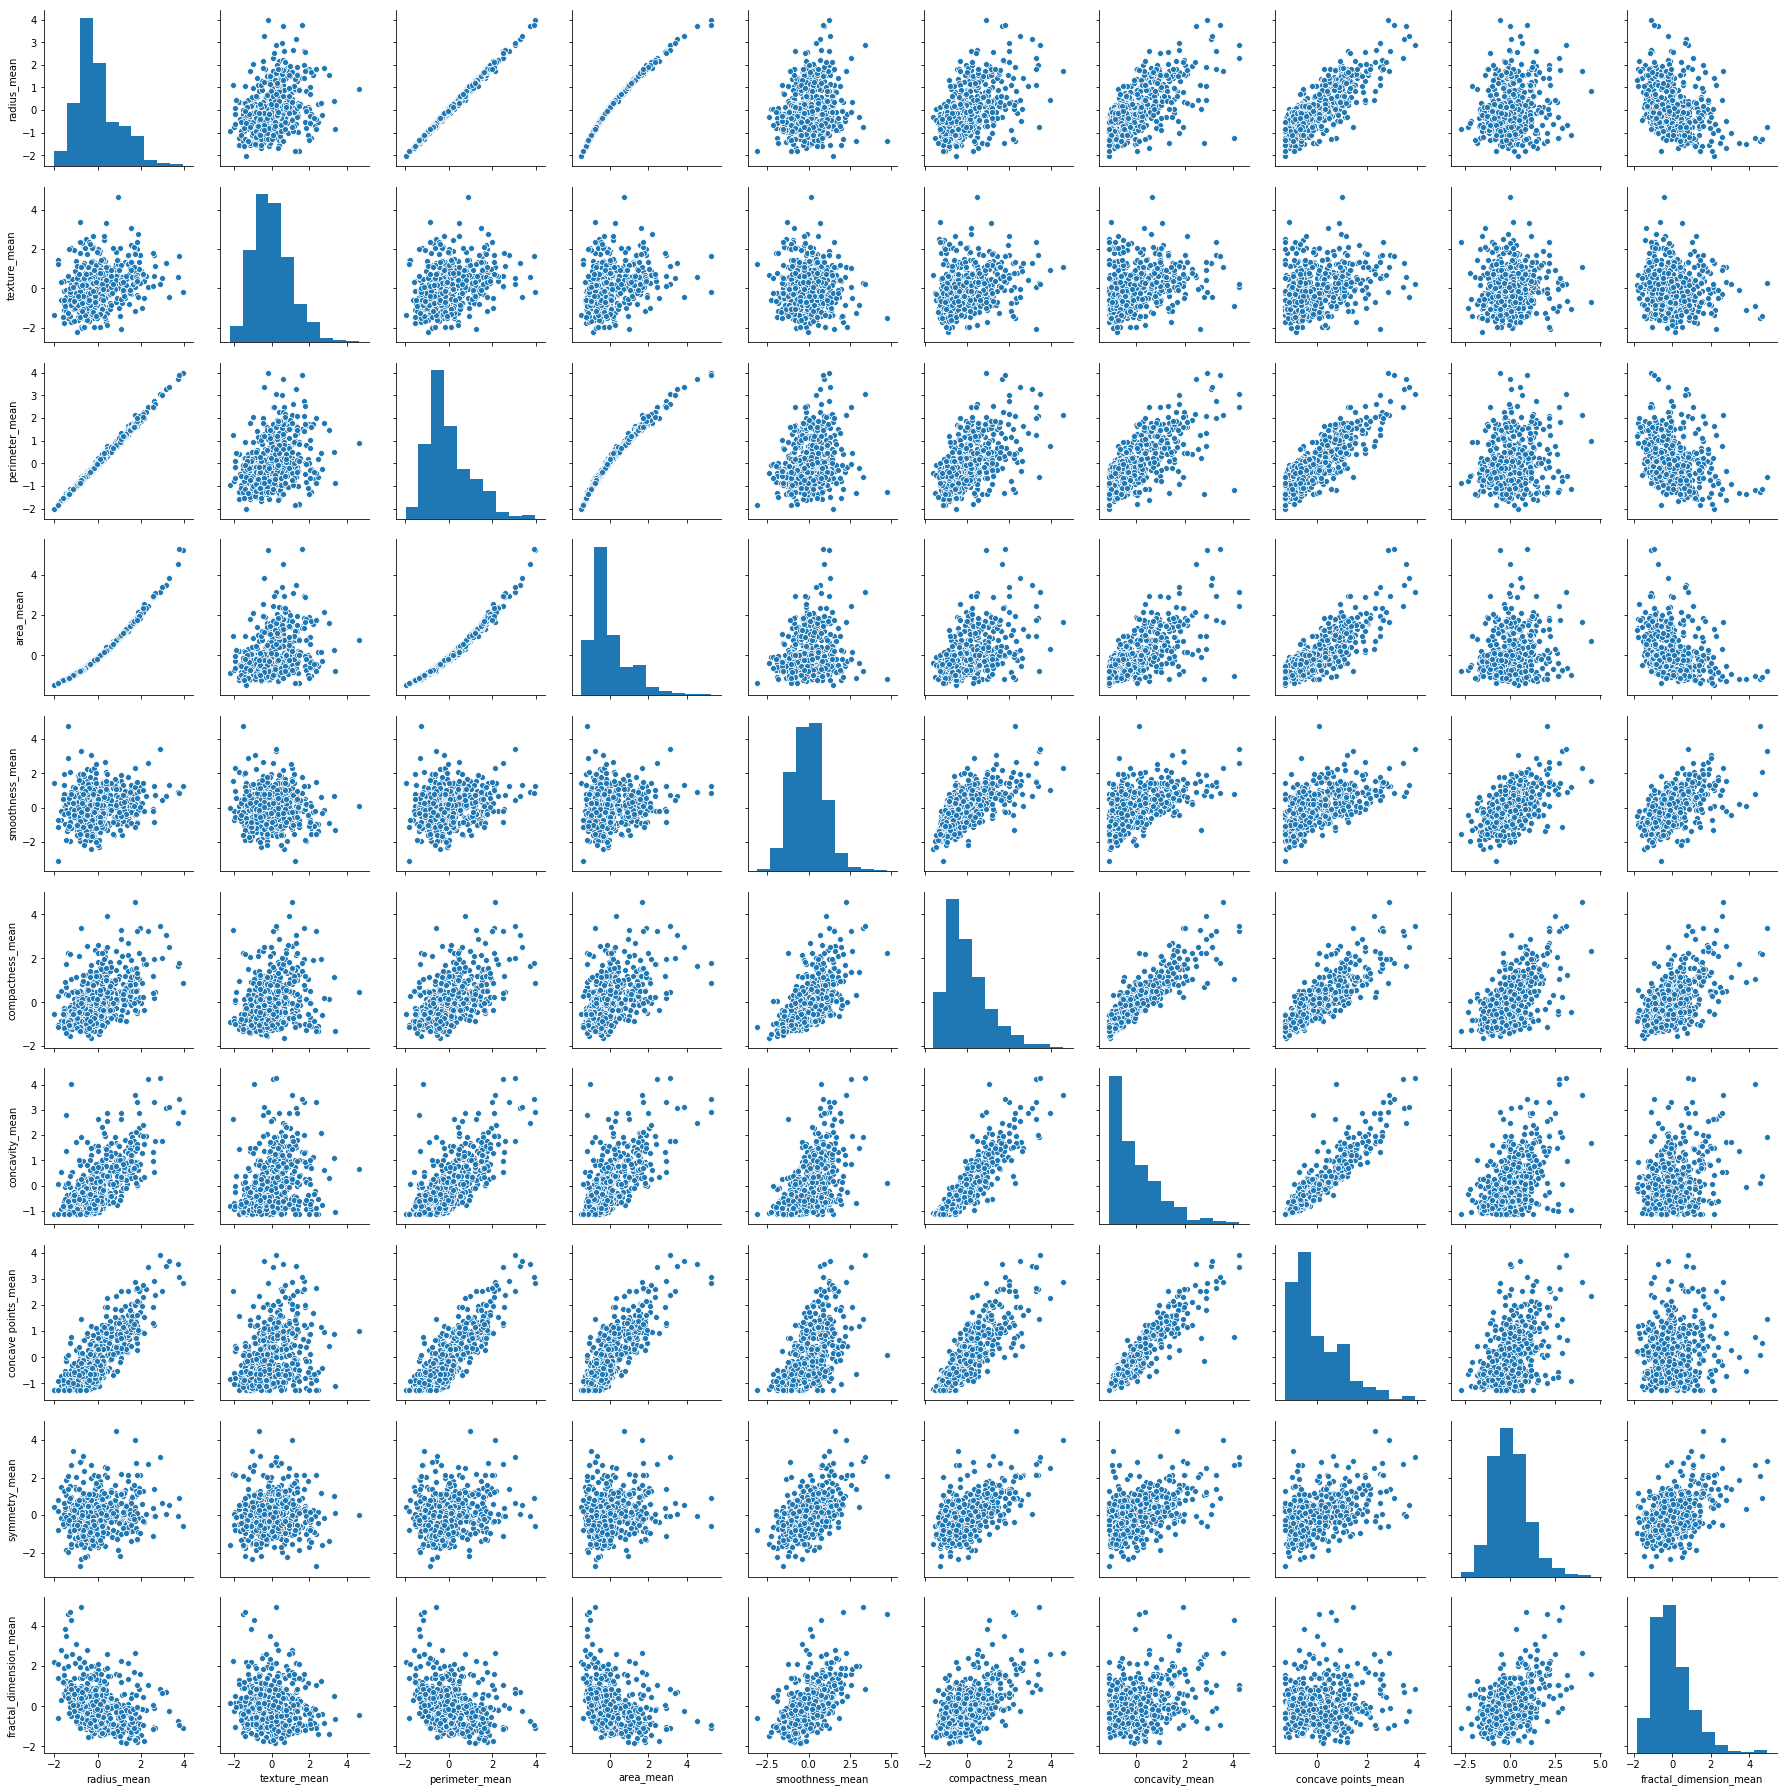

In [24]:
sns.pairplot(df_normal[mean_cols]);

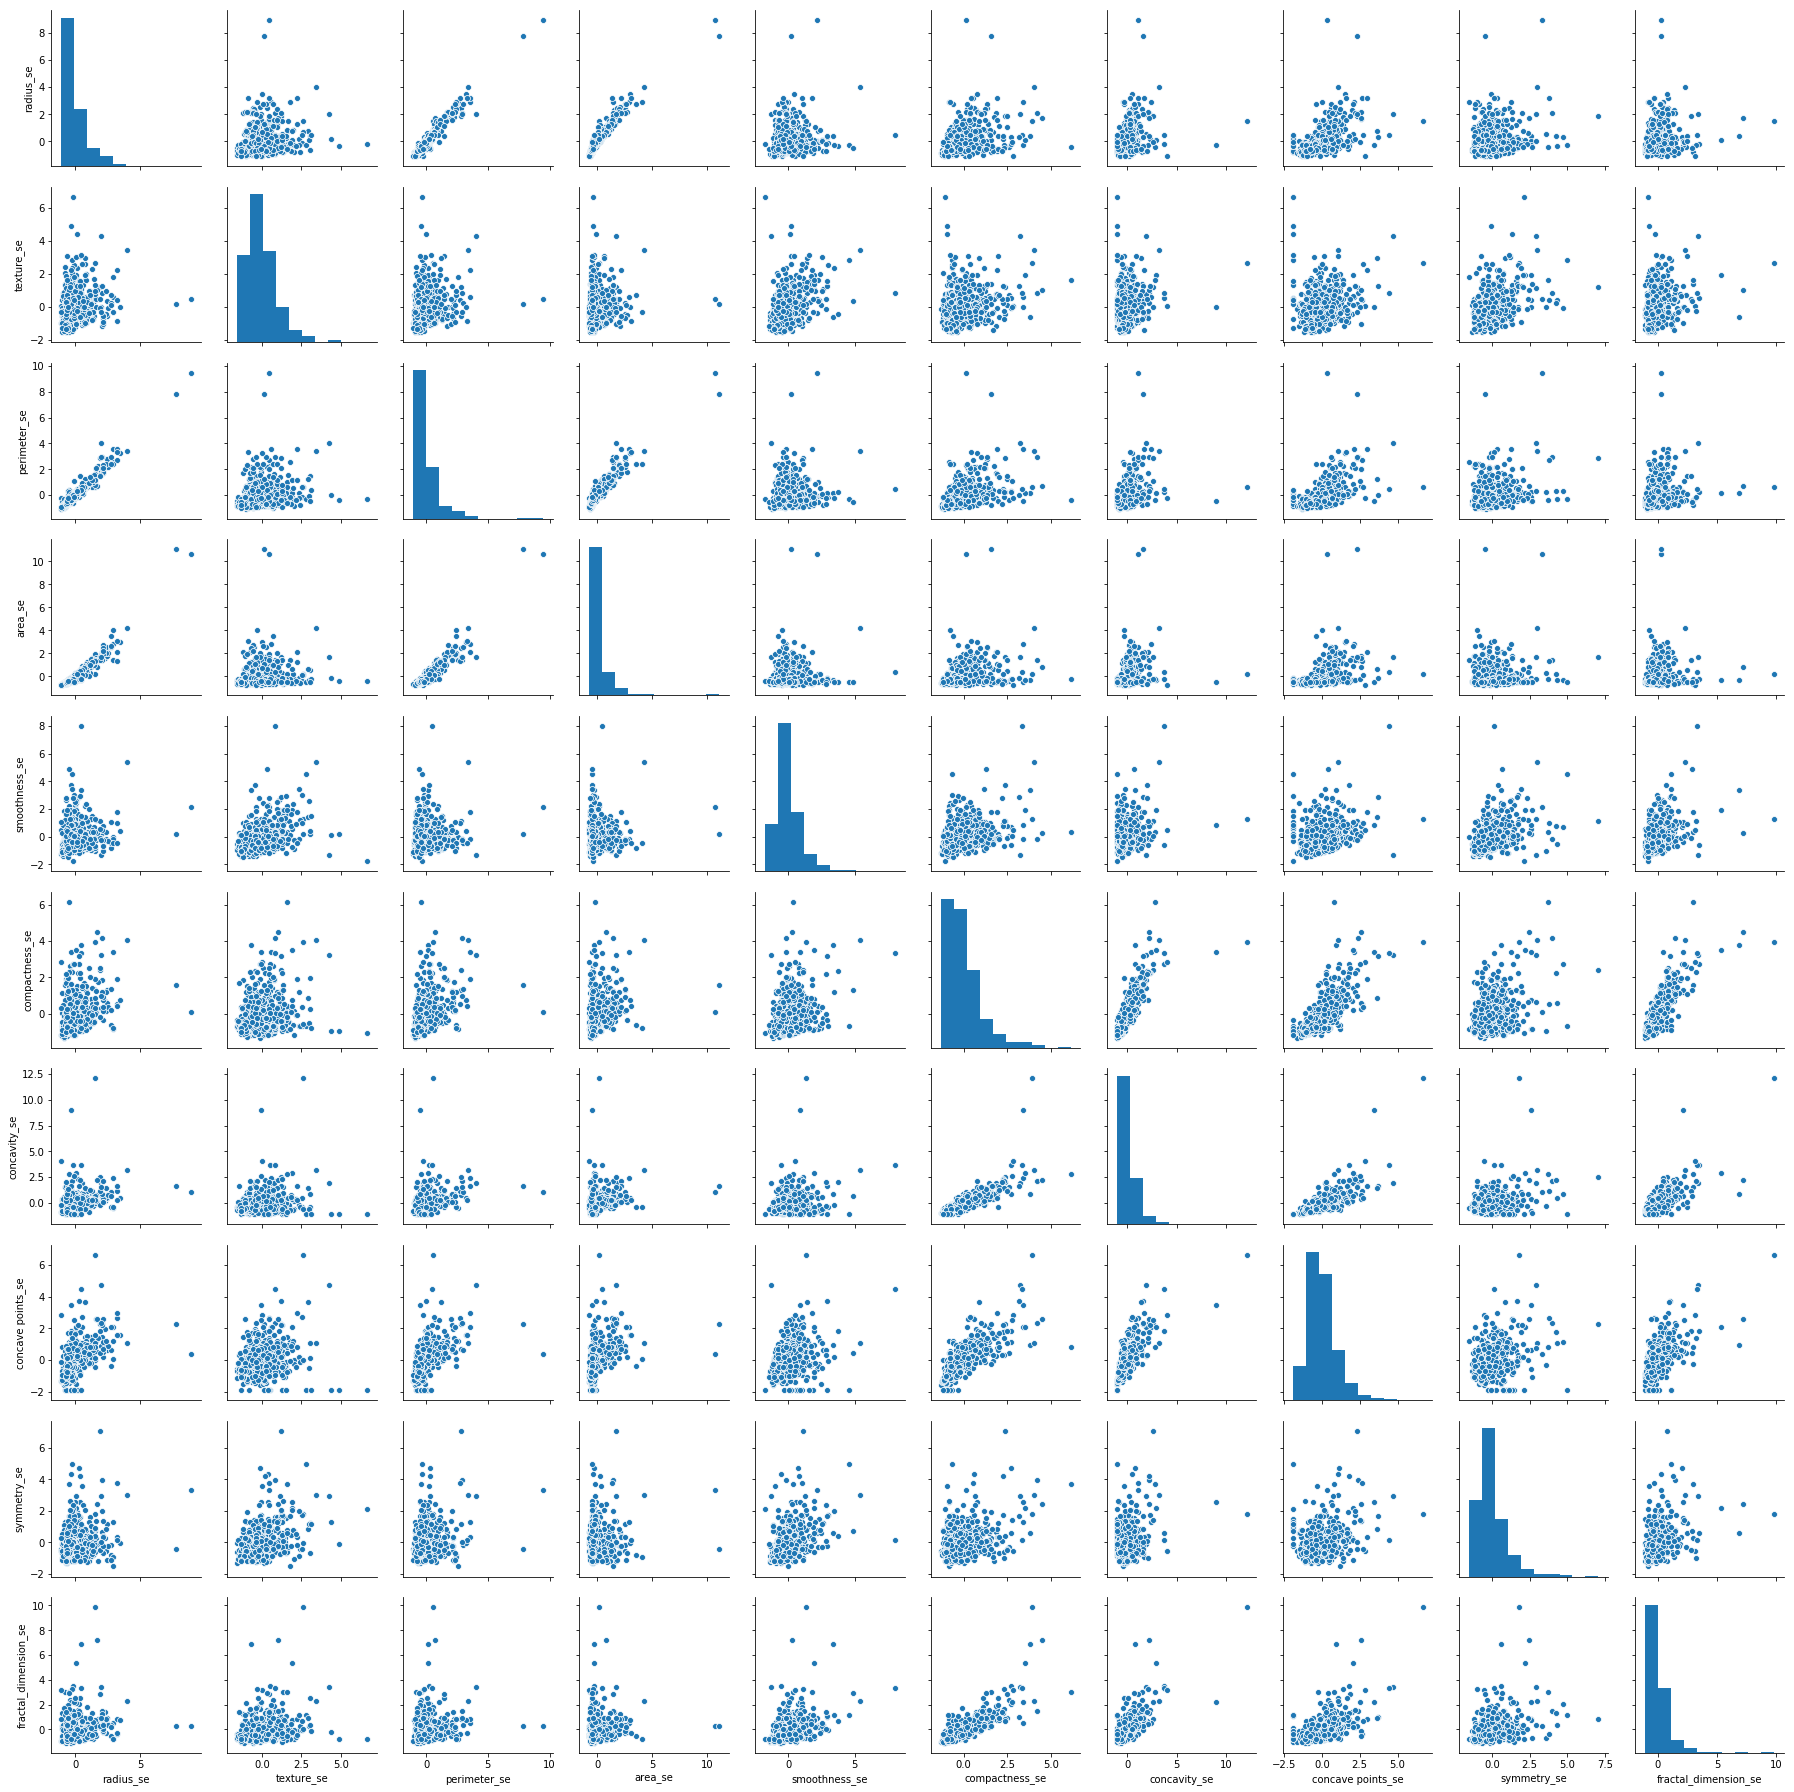

In [25]:
sns.pairplot(df_normal[se_cols]);

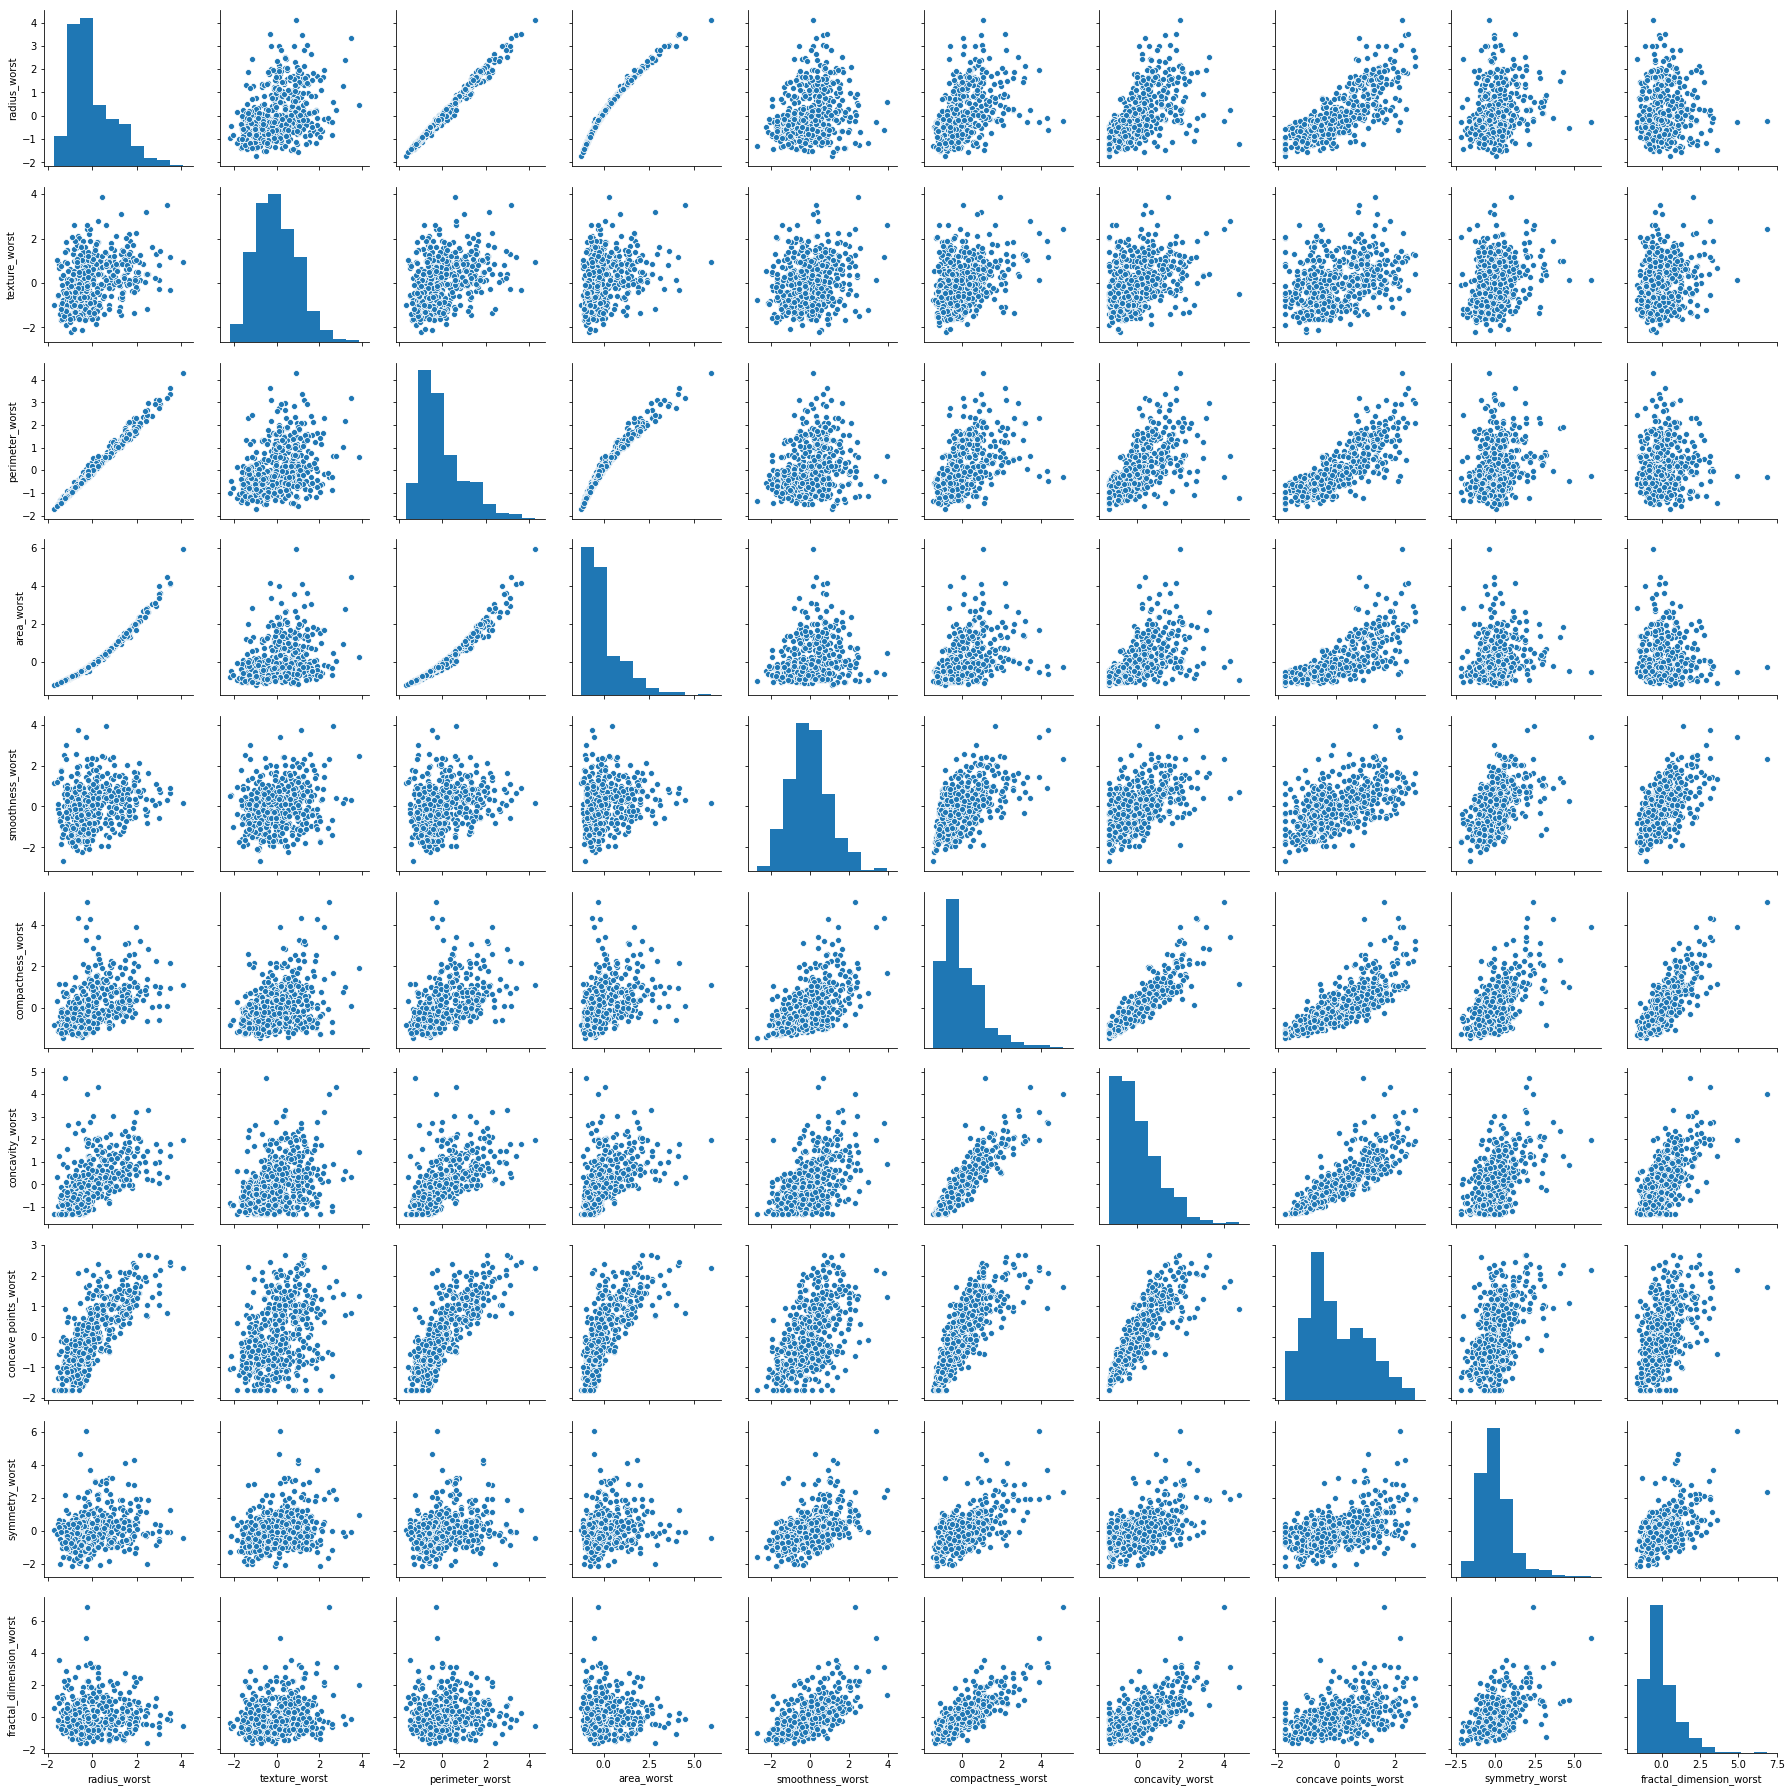

In [26]:
sns.pairplot(df_normal[worst_cols]);

## Violin and Swarm plots for all features


With the violin + swarm plot it is easy to see how the data is distributed, but also to get a initial understanding of how some features could be related to the diagnosis. For example, the "radius worst" feature clearly indicated a relationship to the diagnosis. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

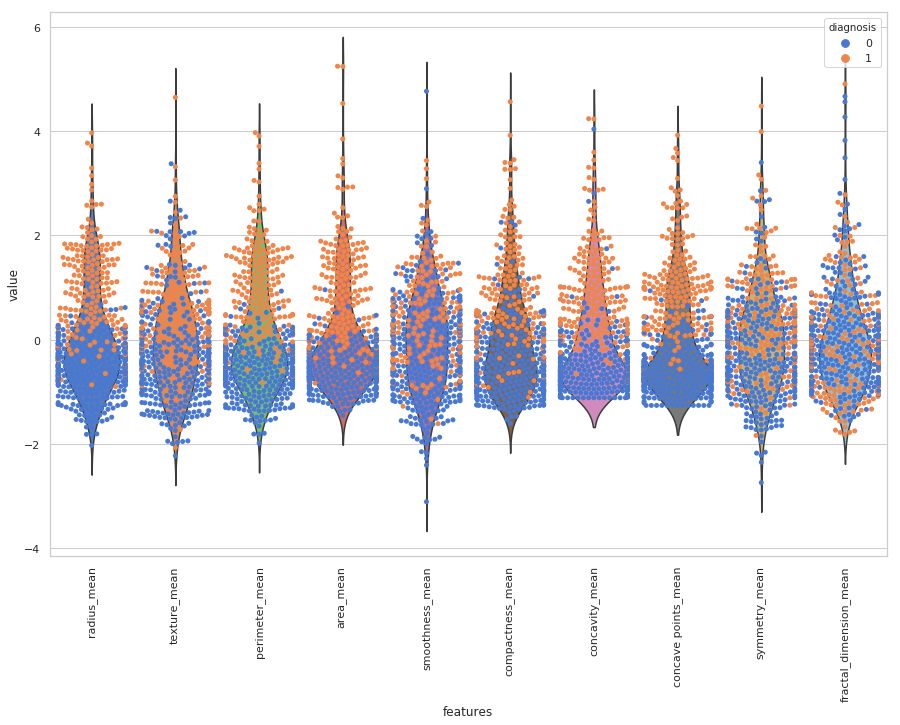

In [27]:
sns.set(style="whitegrid", palette="muted")
data = pd.concat([df_target,df_features_normal[mean_cols]],axis=1) # concat data to form new
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,10))
import time
tic = time.time()
ax = sns.violinplot(x="features", y="value", data=data, inner=None)
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data) 

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

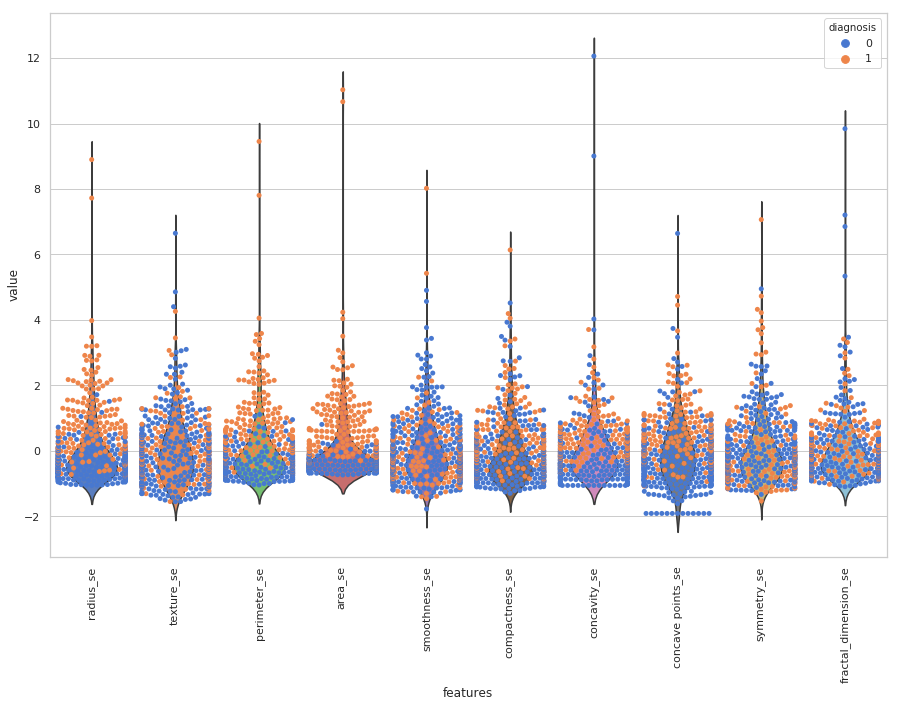

In [28]:
sns.set(style="whitegrid", palette="muted")
data = pd.concat([df_target,df_features_normal[se_cols]],axis=1) # concat data to form new
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,10))
import time
tic = time.time()
ax = sns.violinplot(x="features", y="value", data=data, inner=None)
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data) 

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

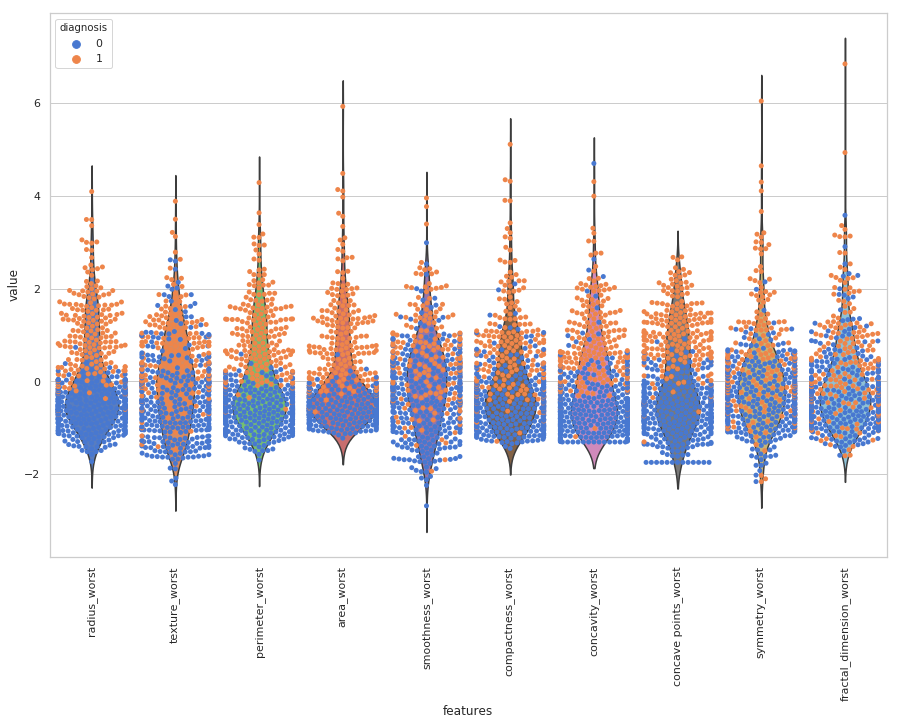

In [29]:
sns.set(style="whitegrid", palette="muted")
data = pd.concat([df_target,df_features_normal[worst_cols]],axis=1) # concat data to form new
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,10))
import time
tic = time.time()
ax = sns.violinplot(x="features", y="value", data=data, inner=None)
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data) 

plt.xticks(rotation=90)

## Correlations

With the correlation plot we can easily get an understanding ofhow variables are associated. Thus, we can get an initial idea or understanding of which features could be of most importance. Furthermore, the correlation analysis could also be used later for feature selection, removing features with a large correlation between them. 

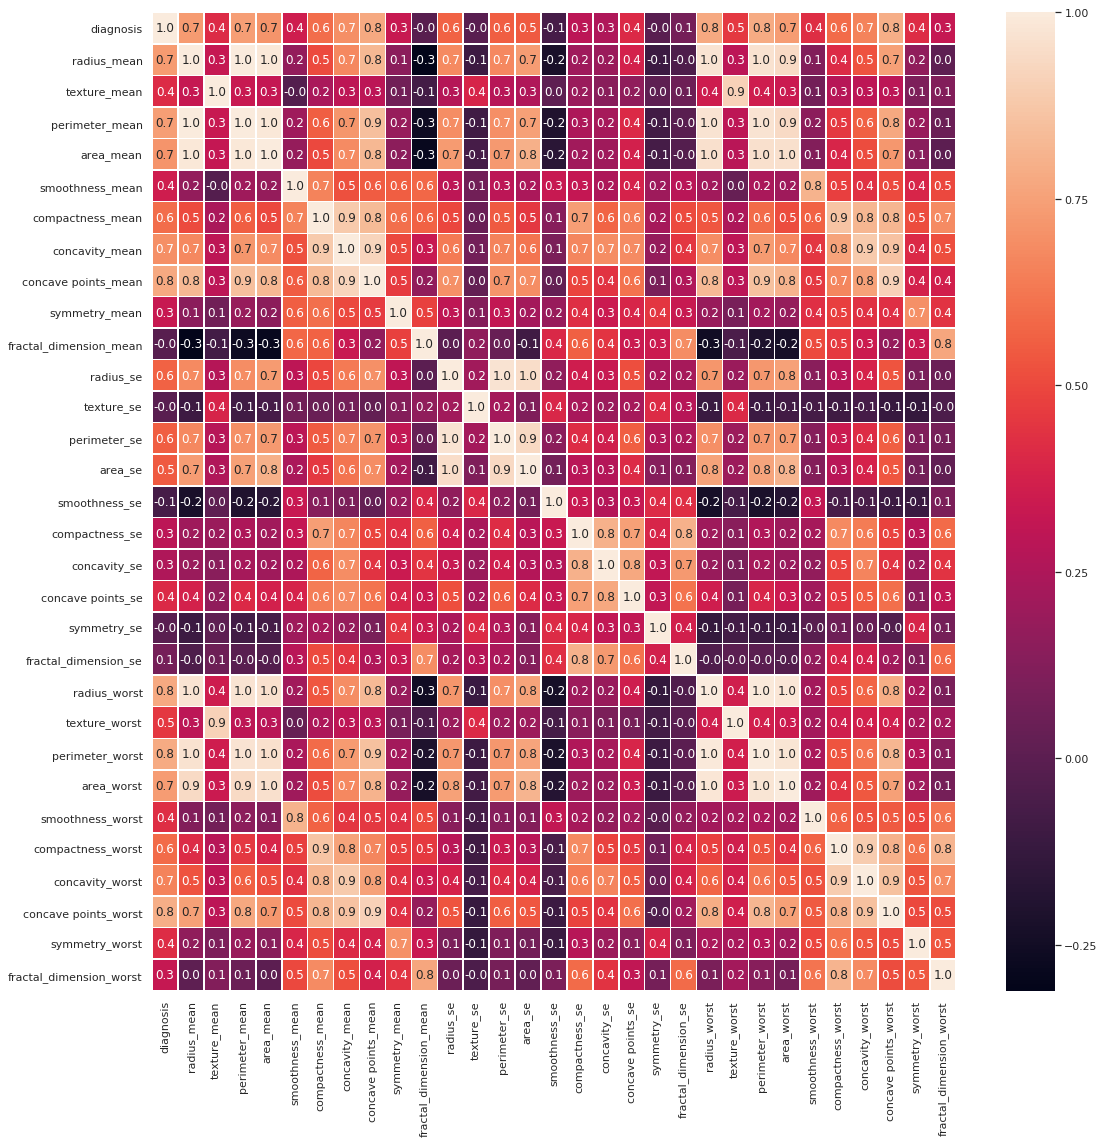

In [30]:
#Using Pearson Correlation
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_normal.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

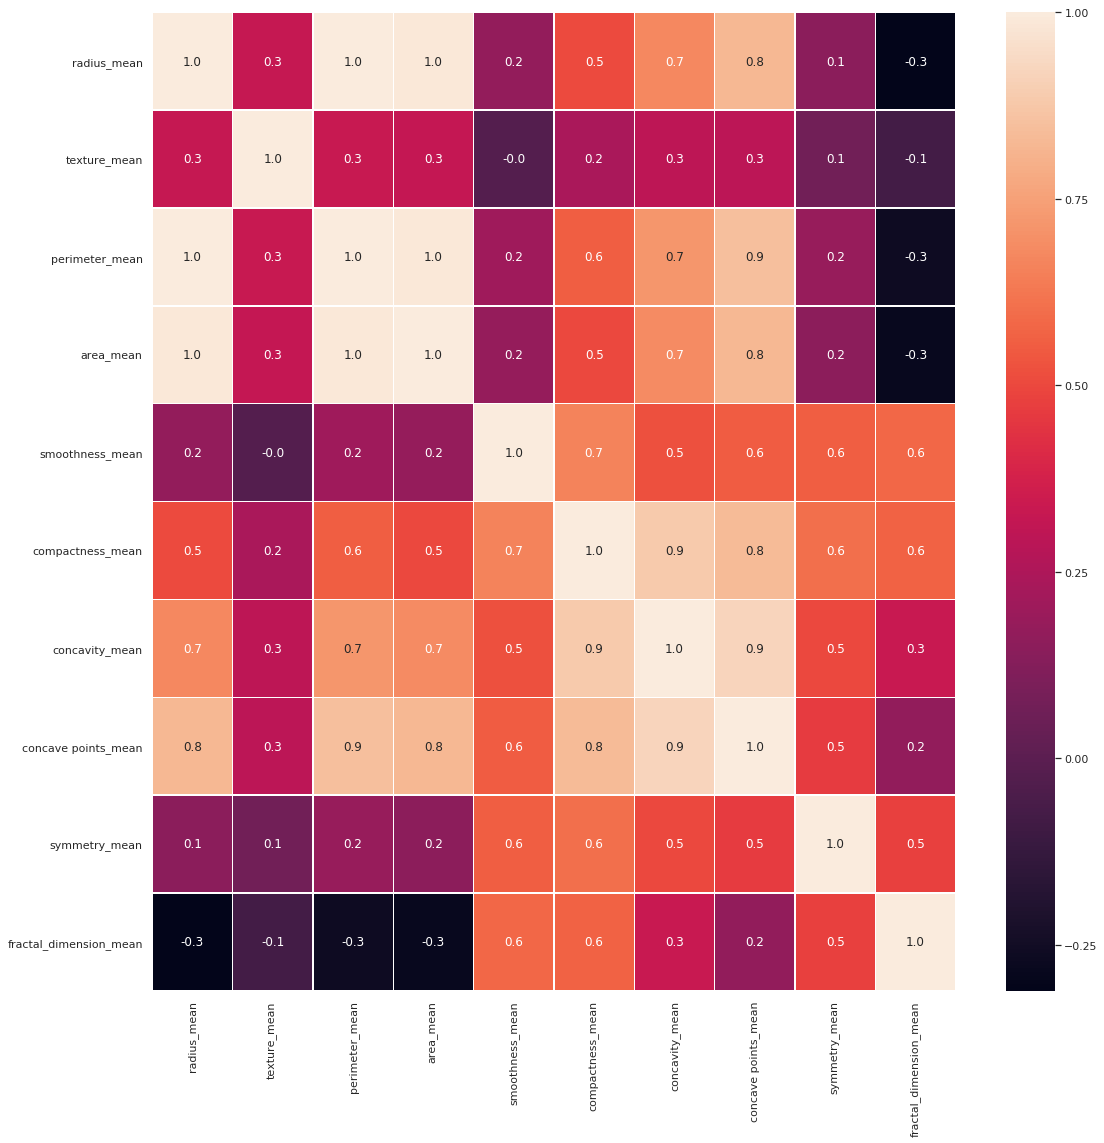

In [31]:
#Using Pearson Correlation
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_normal[mean_cols].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

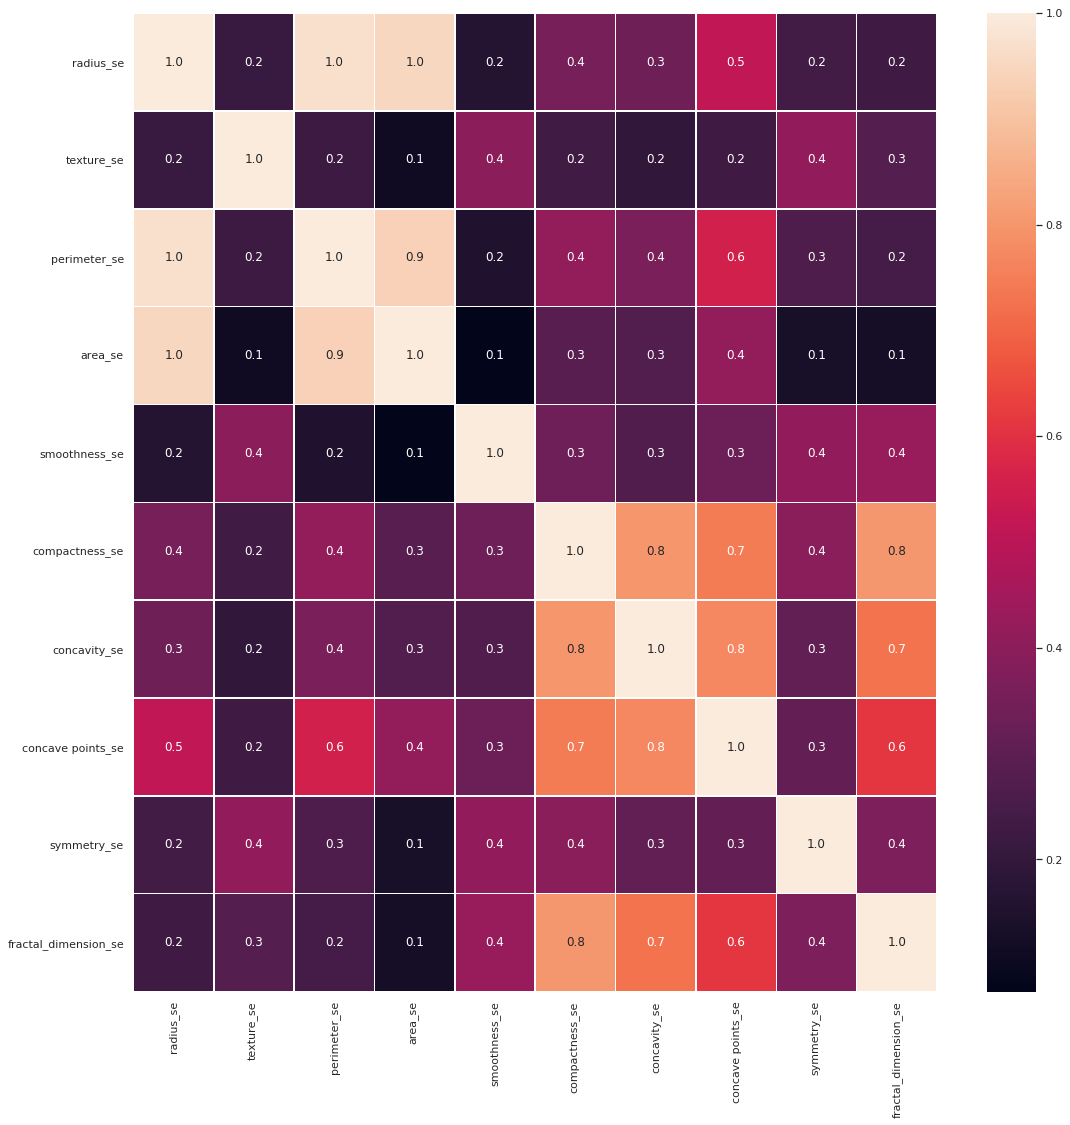

In [32]:
#Using Pearson Correlation
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_normal[se_cols].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

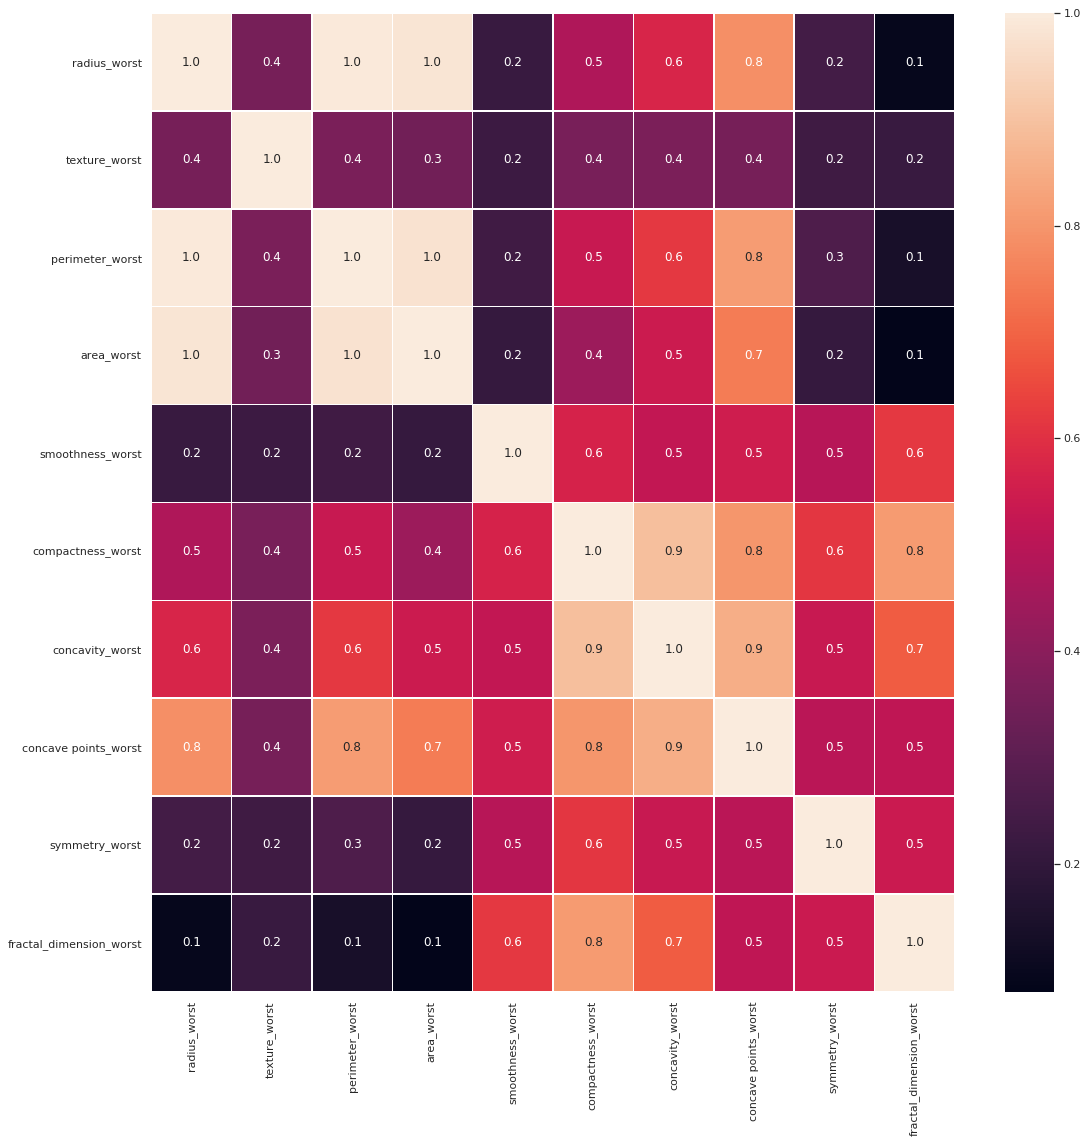

In [33]:
#Using Pearson Correlation
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_normal[worst_cols].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)